# Chapter 6: k Nearest Neighbours

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

## 6.1 Introduction & Motivation

As last classical classifier, we'll check ot the k-NN (Nearest Neighbors) algorithm. This is based on the very simple and logical idea that observations of the same class must resemble each other. In our digit examples this definitely makes sense, but what does this concetely mean and how can we tell a computer when things resemble each other?

This and much more is what we'll learn in this chapter! Excited yet?

## 6.2 Problem Setting

Once again, no surprises should be found in the following setup:

Image Data Shape (1797, 64)
Label Data Shape (1797,)


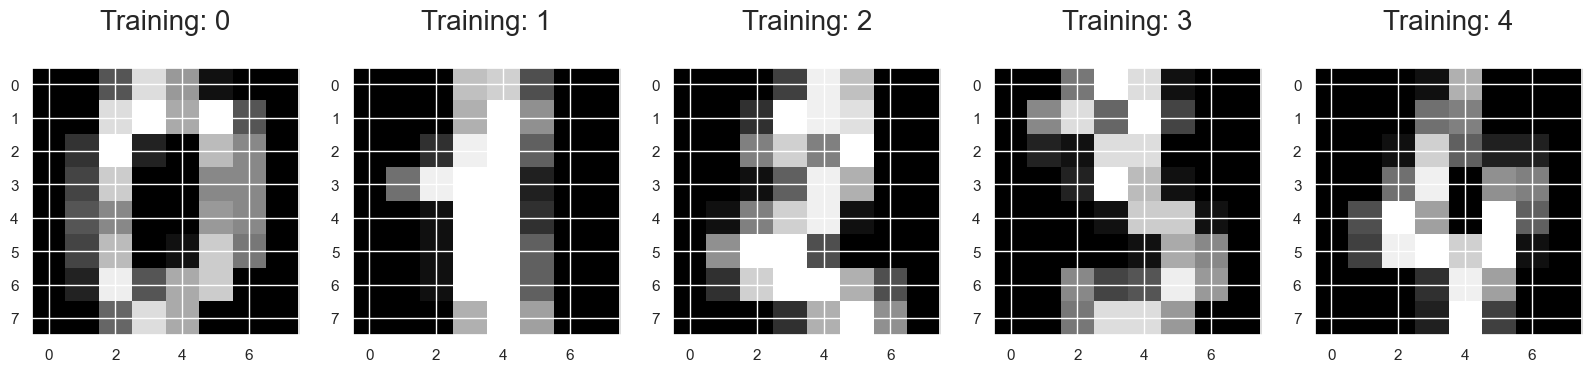

In [2]:
digits = datasets.load_digits()
dir(digits)
# data
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

## 6.3 Model

### 6.3.1 Model

In our digit database the indepent variables are difficult to illustrate, so let's look at a dataset like we did in the previous chapter:

![alt text](https://depiesml.files.wordpress.com/2015/08/knn_plot.png?w=600&h=586)

If we want a model to classify this type of data, we'll make use of one very important property of classes of data: they flock together in the right dimensions. That is, in these two variables (F1 and F2), we can clearly see that all the points of the same class are bunled together. In average, we can say that if we take a random blue point, we'll easier find another blue point nearby rather than say a green or red one.

It is exactly this what kNN does: it takes a point which we want to predict. For example, the grey point:

![alt text](https://depiesml.files.wordpress.com/2015/08/knn-k5-initial1.png?w=600&h=586)

The kNN algorithm then calculates the distance of all points starting from that point, and selects the $k$ nearest datapoints. 

![](https://depiesml.files.wordpress.com/2015/08/knn-k5-neighbor.png)

These points then "vote" on which class we would like to predict. Different voting schemes are possible; but most straightforward will be that: the class which is represented the most will be the prediction.

### 6.3.2 Model Estimation

That all sounds easy enough, but let's put that into practice.
We'll make a 9-Nearest-Neighbours classifier and fit it onto our data:

In [3]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

Next we can either make a prediction for a certain observation, multiple observations, or all observations of our test set:

In [9]:
# Returns a NumPy Array
# Predict for One Observation (image)
neigh.predict(X_test[0].reshape(1,-1))
neigh.predict(X_test[0:10])
predictions = neigh.predict(X_test)

## 6.4 Model Evaluation

### Accuracy

In [10]:
# accuracy
# Use score method to get accuracy of model
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9777777777777777


##### Question 1: Tweak the n_neighbors parameter to check which model gives the highest accuracy. Interpret! Explain what is happening in the model, and what the influence is on the accuracy. Is this logical? Are there any restraints on this parameter?


C:\Users\rikto\AppData\Local\Temp\ipykernel_5852\940342352.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


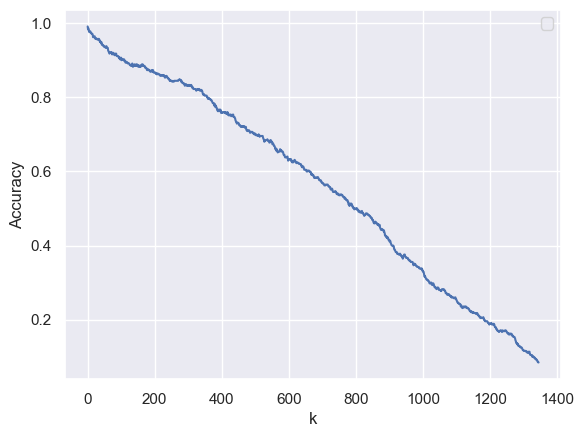

In [20]:
accuracies = []

for x in range (1, 1347):
    neigh = KNeighborsClassifier(n_neighbors=x)
    neigh.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, neigh.predict(X_test)))

plt.plot(accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()

We can see that there is a strong negative linear relation between the value of k and accuracy. This is to be expected. The higher the value of k, the more neighbours are voting on the final label. The more neighbours can vote, the furter they are from our datapoints and the more likely they are to be a different label, leading to a wrong prediction.

In python we get an error starting at k = 1348. This is because our training set only contains 1347 digits. When we go over this number, there are no more neighbours to vote and python throws an error.

### Precision

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      1.00      0.97        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       0.94      1.00      0.97        48
           8       1.00      0.88      0.93        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



##### Question 2: Question 1: Tweak the n_neighbors parameter to check which model gives the highest accuracy. Interpret! Explain what is happening in the model, and what the influence is on precision. Is this logical? 

C:\Users\rikto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rikto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rikto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

C:\Users\rikto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rikto\AppData\Local\Temp\ipykernel_7500\1837552027.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


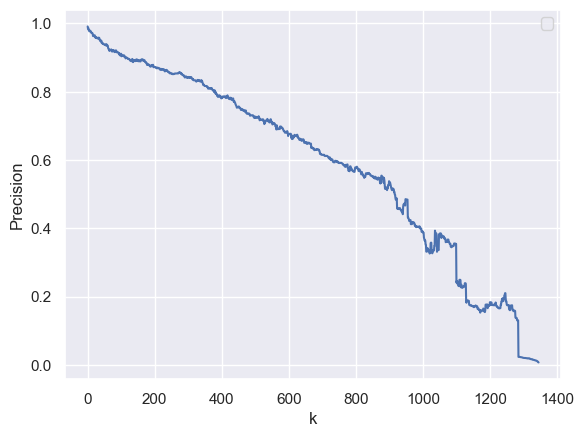

In [3]:
precisions = []

for x in range (1, 1347):
    neigh = KNeighborsClassifier(n_neighbors=x)
    neigh.fit(X_train, y_train)
    precisions.append(precision_score(y_test, neigh.predict(X_test), average='weighted'))

plt.plot(precisions)
plt.xlabel("k")
plt.ylabel("Precision")
plt.legend()
print()

Here we see the exact same, the higher our value of k, the lower our precision. This is expected behaviour as our predictions get worse and worse.

### Confusion Matrix

You should by now be familiar with the confusion Matrix. 

##### Question 3: Make the confusion matrix and interpret it.

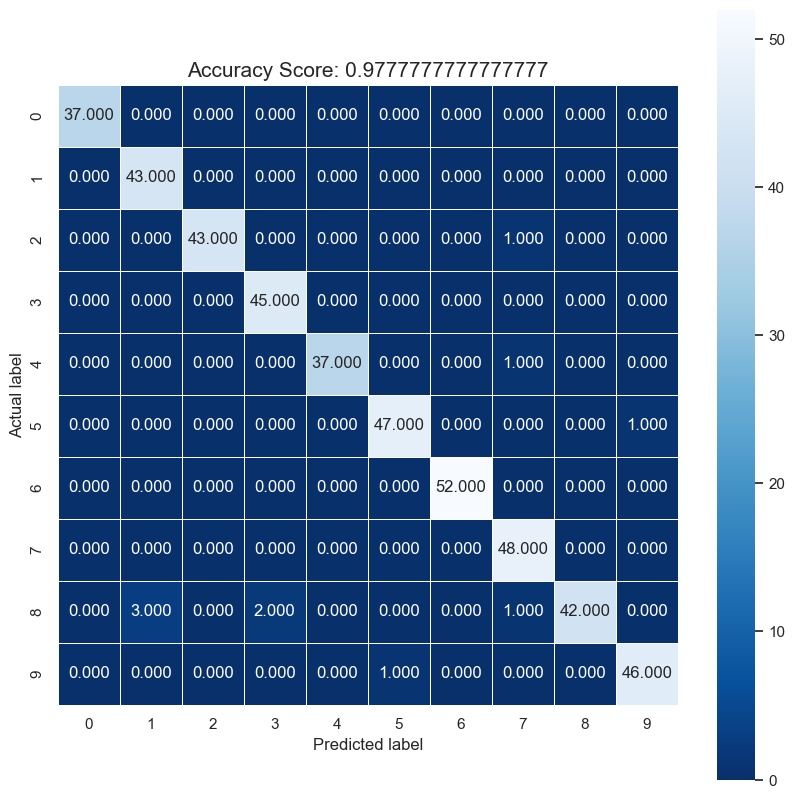

In [26]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train, y_train)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions))
plt.title(all_sample_title, size = 15);

This confusion matrix indicates we have a really good model. We have a strong diagonal of high numbers with very few outliers indicating a lot of our predictions are correct.

## 6.5 Exercises

##### Question 1: See section 6.4
##### Question 2: See section 6.4
##### Question 3: See section 6.4
##### Question 4: Compare the optimal n_neighbours model to the optimal logistic regression and decision tree. Which model do you prefer based upon the accuracy? Which model do you prefer based upon the precision? Which model overall? Or is there no unambiguous choice to be made?

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [44]:
accuracies_log = []
accuracies_tree = []
accuracies_knn = []

for solver in ['lbfgs', 'saga', 'newton-cg']:
    for max_iter in [10, 100, 1000, 10000, 100000]:
        logisticRegr = LogisticRegression(max_iter=max_iter, solver=solver)
        logisticRegr.fit(x_train, y_train)
        accuracies_log.append(accuracy_score(y_test, model.predict(X_test)))

for x in range (1, 101):
    model = DecisionTreeClassifier(max_depth = x)
    model.fit(X_train, y_train)
    accuracies_tree.append(accuracy_score(y_test, model.predict(X_test)))

for x in range (1, 1347):
    neigh = KNeighborsClassifier(n_neighbors=x)
    neigh.fit(X_train, y_train)
    accuracies_knn.append(accuracy_score(y_test, neigh.predict(X_test)))

print('Logistic regression:', max(accuracies_log))
print('Decision trees:', max(accuracies_tree))
print('knn:', max(accuracies_knn))

C:\Users\rikto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rikto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic regression: 0.8288888888888889
Decision trees: 0.8644444444444445
knn: 0.9911111111111112


When comparing all optimal models, we can see that knn is the clear winner with the highest accuraccy. This is likely because our digits dataset looks at the physical shape of written numbers and thus predicting the y values in real life would be done best by looking at similar numbers, which is exactly what knn is based on.

However, we have to take into account that this knn model might be overfitting and thus further exploring is needed using new methods.